# 판다스로 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
"""
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며 
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3은 쌍따옴표를 무시하도록 한다.
"""
# QUOTE_MINIMAL (0), QUOTE_ALL (1), # QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

'\nheader = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며 \ndelimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.\nquoting = 3은 쌍따옴표를 무시하도록 한다.\n'

In [3]:
# 판다스로 데이터 읽어오기
train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3) 

test = pd.read_csv('data/testData.tsv', 
                    header=0, delimiter='\t', quoting=3)

In [4]:
train.shape

(25000, 3)

In [5]:
train.tail(3)

,id,sentiment,review
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [6]:
test.shape

(25000, 2)

In [7]:
test.tail()  # test 데이터는 sentiment가 없다. 이것은 나중에 랜덤 포레스트로 예측해 볼 예정이다.

,id,review
24995,"""2155_10""","""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""","""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."
24999,"""11465_10""","""This is a great horror film for people who do..."


In [8]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [9]:
test.columns.values

array(['id', 'review'], dtype=object)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [11]:
train.describe()  # .describe()데이터의 수, 평균, 표준편차, 최소값, 최대값, quantile

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [12]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [13]:
train['review'][0][:100]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching '

In [14]:
train['review'][0][:300]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe m'

In [15]:
# html 태그가 섞여있기 때문에 이를 정제해줄 필요가 있음
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

In [16]:
# 설치 및 버전확인
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.3
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\runia\anaconda3\lib\site-packages
Requires: 
Required-by: conda-build


## 1. BeautifulSoup으로 html 태그 제거하기

In [17]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "html5lib")

In [19]:
example1

<html><head></head><body>"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br/><br/>Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br/><br/>The actual feature film bi

In [20]:
print(train['review'][0][:700])  # 전처리하기전 데이터

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


In [21]:
example1.get_text()[:700]       # 뷰티풀숩으로 정제한 데이터

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

## 2. 정규표현식을 사용해서 특수문자를 제거

In [22]:
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

## 3. 모두 소문자로 변환한다.

In [23]:
lower_case = letters_only.lower()
lower_case[:700]

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyw'

## 4. 문자를 토큰화(split)

In [24]:
words = lower_case.split()
print(len(words))
words[:10]   # 단어(토큰) 갯수는 437개

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [25]:
# nltk.download()   # nltk를 설치해야 한다.
import nltk  # nltk 임포트

In [26]:
from nltk.corpus import stopwords

In [27]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## 5. 불용어(Stopword) 제거 (NLTK 데이터를 사용)

In [28]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]   # stopwards 제거해보니 단어 갯수는 219개

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

## 6. 어간추출(Stemming)과 음소표기법(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간을 추출

In [29]:
# 포터 스태머의 사용 예
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

maximum
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [30]:
# 랭커스터 스태머의 사용 예
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running is: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [31]:
# stemmer 처리 전 단어
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [32]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

In [33]:
words = [stemmer.stem(w) for w in words]
# SnowballStemmer 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [34]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
# 처리 후 단어
words[:7]

fly
fly


['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music']

## ★위의 1~6 과정을 함수로 만들어보면★

In [35]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    
    # 3. 소문자 변환
    words = letters_only.lower().split()
    
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords 를 세트로 변환한다.
    stops = set(stopwords.words('english'))
    
    # 5. Stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words) )

In [36]:
# train데이터 처리
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [37]:
# test 데이터 처리
clean_review_test = review_to_words(test['review'][0])
clean_review_test

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [38]:
# 첫 번째 리뷰를 대상으로 전처리 해줬던 내용을 전체 텍스트 데이터를 대상으로 처리한다.
# 전체 리뷰 데이터 수 가져오기
num_reviews = train['review'].size
num_reviews

25000

In [39]:
num_reviews = test['review'].size
num_reviews

25000

## review 25000개 전체에 걸친 반복작업

In [40]:
"""
clean_train_reviews = []    # 빈 공간을 미리 만들어두고, (clean_train_reviews)
캐글 튜토리얼에는 range가 xrange로 되어있지만 
여기에서는 python3를 사용하기 때문에 range를 사용했다.
"""
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i]))

"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# clean_train_reviews = []
# for i in range(0, num_reviews):
#     if (i + 1)%5000 == 0:
#         print('Review {} of {} '.format(i+1, num_reviews))
#     clean_train_reviews.append(review_to_words(train['review'][i]))
    
"""
그리고 코드를 좀 더 간결하게 하기 위해 for loop를 사용하는 
대신 apply를 사용하도록 개선
"""    
# %time train['review_clean'] = train['review'].apply(review_to_words)
"""
코드는 한 줄로 간결해 졌지만 여전히 오래 걸림
"""
# CPU times: user 1min 15s, sys: 2.3 s, total: 1min 18s
# Wall time: 1min 20s

'\n코드는 한 줄로 간결해 졌지만 여전히 오래 걸림\n'

In [41]:
# # review 25000개에 for문 돌린다. 시간은 1분정도 걸림
# clean_train_reviews = []    # 빈 공간을 미리 만들어두고, 
# for i in range(0, num_reviews):
#     clean_train_reviews.append( review_to_words(train['review'][i])) # 2분정도 걸림

In [42]:
# clean_train_reviews[:3]

In [43]:
"""
하지만 위 코드는 어느 정도 실행이 되고 있는지 알 수가 없어서
5000개 단위로 상태를 찍도록 개선했다.
"""
# train
clean_train_reviews = []
for i in range(0, num_reviews):
    if (i + 1)%5000 == 0:
        print('Review {} of {} '.format(i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train['review'][i]))
    

Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 


In [42]:
"""
그리고 코드를 좀 더 간결하게 하기 위해 for loop를 사용하는
대신 apply를 사용하도록 개선
"""    
%time train['review_clean'] = train['review'].apply(review_to_words)

Wall time: 52.3 s


In [44]:
# test도 review_to_words로 단어 벡터화
clean_test_reviews = []
for i in range(0, num_reviews):
    if (i + 1)%5000 == 0:
        print('Review {} of {} '.format(i+1, num_reviews))
    clean_test_reviews.append(review_to_words(test['review'][i]))

Review 5000 of 25000 
Review 10000 of 25000 
Review 15000 of 25000 
Review 20000 of 25000 
Review 25000 of 25000 


## 워드클라우드

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

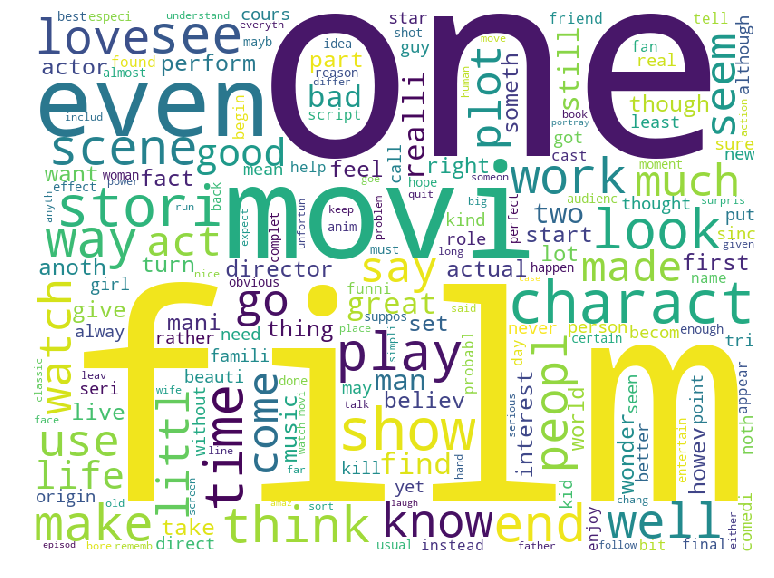

Wall time: 41.6 s


In [46]:
# train 데이터의 모든 단어에 대한 워드 클라우드를 그려본다. 
%time displayWordCloud(' '.join(clean_train_reviews))      # .join(list) : list에서 문자열로

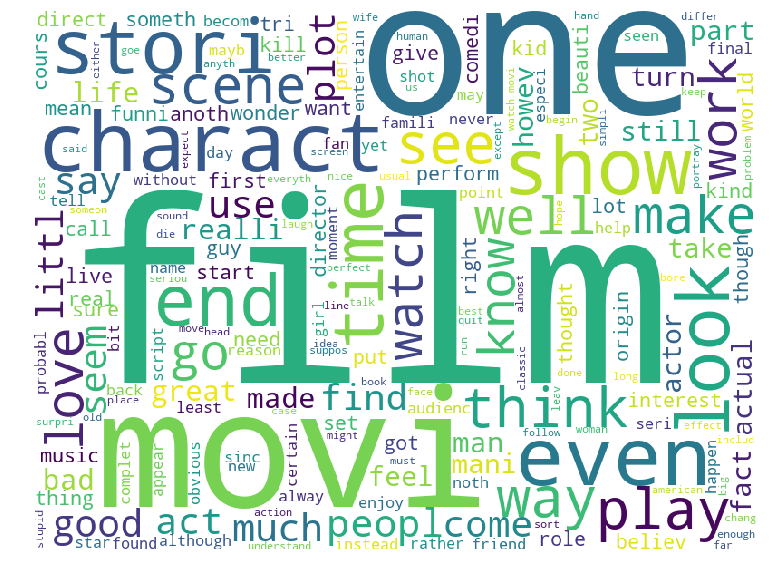

Wall time: 40.4 s


In [47]:
# test 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_test_reviews))

In [48]:
train[:2]

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."


In [49]:
type(clean_train_reviews)

list

In [50]:
clean_train_reviews[:2]

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl sta

In [51]:
pd_clean_train_reviews = pd.DataFrame({'col':clean_train_reviews})

In [52]:
pd_clean_train_reviews[:5]

,col
0,stuff go moment mj start listen music watch od...
1,classic war world timothi hine entertain film ...
2,film start manag nichola bell give welcom inve...
3,must assum prais film greatest film opera ever...
4,superbl trashi wondrous unpretenti exploit hoo...


In [53]:
pd_clean_train_reviews[:2]

,col
0,stuff go moment mj start listen music watch od...
1,classic war world timothi hine entertain film ...


In [54]:
# 단어수 ??? list 형식이라 pandas의 apply를 못쓴다..
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
# train['num_words']

AttributeError: 'list' object has no attribute 'apply'

In [146]:
# 중복을 제거한 단어 수
train['num_uniq_words'] = len(set(str(clean_train_reviews).split()))

In [222]:
pd_clean_train_reviews.loc[0]

col    stuff go moment mj start listen music watch od...
Name: 0, dtype: object

In [48]:
# 첫 번째 리뷰에 
x = clean_train_reviews[0]
x = str(x).split()
print(len(x))
print(x)
x[:10]

219
['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari', 'watch', 'wiz', 'watch', 'moonwalk', 'mayb', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'realli', 'cool', 'eighti', 'mayb', 'make', 'mind', 'whether', 'guilti', 'innoc', 'moonwalk', 'part', 'biographi', 'part', 'featur', 'film', 'rememb', 'go', 'see', 'cinema', 'origin', 'releas', 'subtl', 'messag', 'mj', 'feel', 'toward', 'press', 'also', 'obvious', 'messag', 'drug', 'bad', 'kay', 'visual', 'impress', 'cours', 'michael', 'jackson', 'unless', 'remot', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'bore', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movi', 'mj', 'fan', 'would', 'say', 'made', 'fan', 'true', 'realli', 'nice', 'actual', 'featur', 'film', 'bit', 'final', 'start', 'minut', 'exclud', 'smooth', 'crimin', 'sequenc', 'joe', 'pesci', 'convinc', 'psychopath', 'power', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', 'mj', 'overheard', 'plan', 'nah', 'joe', 'pesc

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

KeyError: 'num_words'

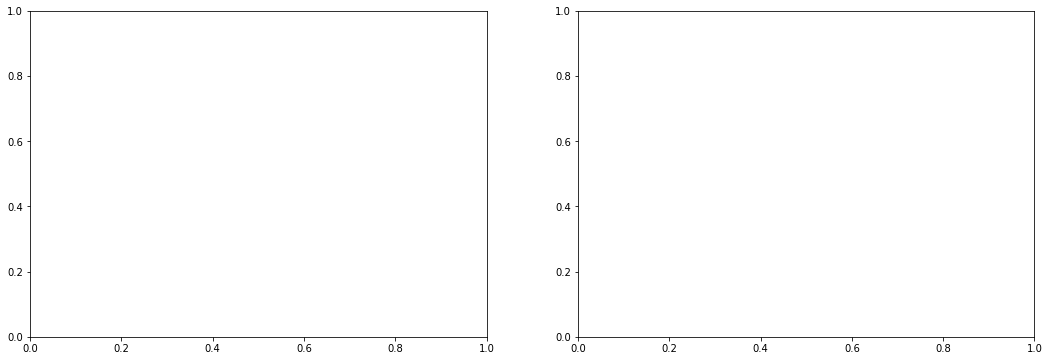

In [61]:
import seaborn as sns   #??? 위에서 train['num_words']가 정의가 안되었으므로 에러가 난다.

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 값 :', train['num_words'].mean())
print('리뷰별 단어 중간 값', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')  # 중간값 점선 표시
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 값 :', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 중간 값', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed') # 중간값 점선 표시
axes[1].set_title('리뷰별 고유한 단어 수 분포')

### => 여기까지가 데이터 전처리
### 이제 전처리한 텍스트 데이터들을 벡터화 해보자.

# Bag-of-words model - Wikipedia

### 사이킷런의 CountVectorizer를 통해 피처 생성

In [117]:
# pip install sklearn 필요
from sklearn.feature_extraction.text import CountVectorizer   # CountVectorizer 임포트
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라메터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,       # 토큰이 나타날 최소 문서 개수 2개
                             ngram_range=(1, 3), 
                             max_features = 20000   # feature(단어) 수는 20000개로 제한
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [118]:
# 이 vectorizer를 바로 fit.transform으로 학습 시키면 속도가 오래 걸리므로,
# 속도 개선을 위해 파이프라인을 사용하여 학습 시킴
# 참고 : https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph

pipeline = Pipeline([
    ('vect', vectorizer),
])

# scaler, classifier 들을 Pipeline 안에 넣을 수 있다.
# 사용 예)
# Pipeline([
#             ('scaler', StandardScaler()), 
#             ('classifier', LogisticRegression()),
#         ])

In [119]:
# fit_transform() 메서드를 사용하여 계수 추정과 자료 변환을 동시에 실행할 수도 있다.
%time train_data_features = pipeline.fit_transform(clean_train_reviews)

Wall time: 32.2 s


In [59]:
train_data_features 

<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [120]:
# 학습된 데이터로 feature가 생성 되었다! shape을 확인해보자.
train_data_features.shape  # 리뷰 데이터 25000개, 단어 종류 20000개

(25000, 20000)

In [121]:
# feature 이름 추출해보기
vocab = vectorizer.get_feature_names()  
print(len(vocab))   # feature(단어) 수 20000개 = vocab 수
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [56]:
# 벡터화 된 feature(단어)를 확인해 봄(numpy를 사용해서)
import numpy as np
dist = np.sum(train_data_features, axis=0)
dist  # 리뷰당 단어의 갯수

matrix([[26, 48, 22, ..., 59, 40, 23]], dtype=int64)

In [58]:
for tag, count in zip(vocab, dist):
    print(count, tag)    # ->  [[26 48 22 ... 59 40 23]] aag
    
# 판다스의 데이터 프레임으로 단어 수 확인해보기    
# 25000개 리뷰의 단어 20000개 각각의 출현빈도 파악
pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,288,24,30,29,30,125,55,...,23,52,37,89,161,31,71,59,40,23


In [60]:
type(train_data_features)

scipy.sparse.csr.csr_matrix

In [61]:
# 리뷰 별로 단어 갯수 파악하기.   pd.DataFrame(행렬.toarray(), columns= )쓰면 배열로 만들어줌.
pd.DataFrame(train_data_features.toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 랜덤 포레스트 - 위키백과

Q. 리뷰가 추천인지 비추천인지 랜덤포레스트로 예측해보자

- 디시젼 트리들을 여러개 만들어서 다수결 또는 평균을 내는 형식으로 
- 랜덤 포레스트의 가장 핵심적인 특징은 임의성(randomness)에 의해 서로 조금씩 다른 특성을 갖는 트리들로 구성된다는 점이다. 
- 이 특징은 각 트리들의 예측(prediction)들이 비상관화(decorrelation)되게 하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 
- 또한, 임의화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해 성능 좋게 만든다.

In [62]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest 

# <RF 파라미터 설명>
# n_estimators: (가용한 시간, 메모리 안에서) 숫자 클수록 Score up.(더 많은 트리->과대적합 down)
# n_jobs = -1 : cpu core를 모두 사용하라(2 : 2개의 core를 사용해라)
# random_state=2018 : 랜덤포레스트 돌릴 때마다 항상 같은 score를 가지도록.(파라미터 튜닝 위해)

C:\Users\runia\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

## 학습(랜덤 포레스트)을 시켜보자!

In [63]:
# feature 행렬 데이터와 sentiment 벡터 데이터를 넣어서 랜덤 포레스트 학습을 시킨다.
%time forest = forest.fit(train_data_features, train['sentiment']) 

Wall time: 13.1 s


In [65]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [66]:
# 학습시킨 데이터를 Cross Validation해서 스코어 내기(ROC 커브 활용해서)
from sklearn.model_selection import cross_val_score 
%time score = np.mean(cross_val_score(\
    forest, train_data_features, \
    train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 2min 16s


In [67]:
# 예측 정확도는?
score

0.92761104

## 이 랜덤포레스트의 score는 0.92761점이구나!!! 
#### 꽤 높은 점수인거 같은데??!! 맞나?

In [69]:
# 위에서 정제해준 테스트 데이터의 첫 번째 리뷰를 확인
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [70]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

Wall time: 6.71 s


In [71]:
test_data_features
# 벡터화한 테스트 데이터를 출력해보니 다 0만 나오네? 0만 있나?

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
# 벡터화 된 단어로 숫자가 문서에서 등장하는 횟수를 나타낸다
test_data_features[5][:100]   # 6번째 리뷰의 100개 단어를 뽑아보자. 숫자는 vocab(단어)가 몇번 등장하는지를 의미.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
# vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact person', 'charact play', 'charact plot')

### 여기까지 훈련 데이터를 학습시킨 것
## 예측(sentiment)을 해보자! (테스트 데이터로)

In [80]:
# 테스트 데이터를 넣고 sentiment를 예측한다. 앞 10개만 보자.
result = forest.predict(test_data_features)
result[:10]   # 와우~예측이 잘 되었네!!!

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

## test 데이터 예측결과를 csv 파일로 저장해보자. 

In [78]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head(10)

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",0
3,"""7186_2""",1
4,"""12128_7""",1
5,"""2913_8""",1
6,"""4396_1""",0
7,"""395_2""",1
8,"""10616_1""",0
9,"""9074_9""",0


In [81]:
# data 폴더에 csv파일로 output 저장하기 (score를 이름에 넣고 저장)
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3) # quoting=3 : 쌍따옴표 무시

In [82]:
output_sentiment = output['sentiment'].value_counts()  # 예측치(output)의 sentiment 긍정(1), 부정(0) 수 계산. train 데이터는 긍정, 부정이 12500개씩 들어가 있었다.
print(output_sentiment[0] - output_sentiment[1])  # test 데이터로 예측한 것에는 긍정, 부정 수 차이가 108이다. 

108


In [84]:
output_sentiment    # test 데이터로 예측한 것에는 긍정, 부정 수가 다음과 같다.

0    12554
1    12446
Name: sentiment, dtype: int64

## test 데이터 예측결과를 train 데이터와 비교해서 그래프로 그려보자

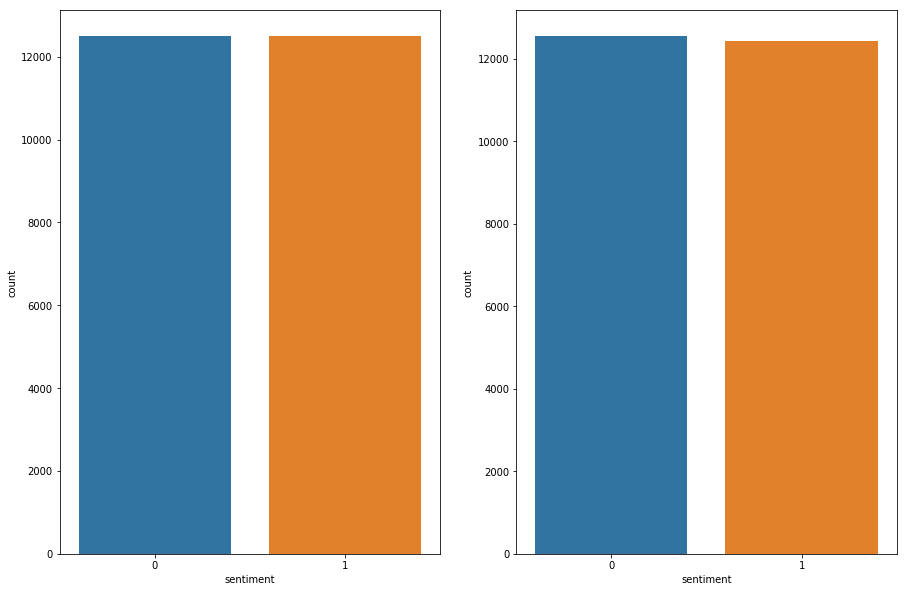

In [91]:
import seaborn as sns 

fig, axes = plt.subplots(ncols=2)  # plt.subplots : 2개의 그래프를 한 줄에 보여줌
fig.set_size_inches(15,10)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

In [94]:
print(315/578)   # 상위 54%

0.5449826989619377


## 파라메터를 조정해 가며 캐글 점수와 등수를 조금씩 올려본다.

In [95]:
# uni-gram 사용 시 캐글 점수 0.84476
print(436/578)
# tri-gram 사용 시 캐글 점수 0.84608
print(388/578)
# 어간추출 후 캐글 점수 0.84780
print(339/578)
# 랜덤포레스트의 max_depth = 5 로 지정하고
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.81460
print(546/578)
# 랜덤포레스트의 max_depth = 5 는 다시 None으로 변경
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85272
print(321/578)
# CountVectorizer의 tokenizer=nltk.word_tokenize 를 지정 후 캐글 점수 0.85044
print(326/578)
# CountVectorizer max_features = 10000개로 변경 후 캐글 점수 0.85612
print(305/578)
# 0.85884
print(296/578)

print(310/578)

0.754325259515571
0.671280276816609
0.5865051903114187
0.9446366782006921
0.5553633217993079
0.5640138408304498
0.527681660899654
0.5121107266435986
0.5363321799307958
